In [4]:
# IMPORTING LIBRARIES 
# Data handling
import os
import numpy as np 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix 

In [5]:
# DEFINING  DATASE PATH
base_dir = "dataset"
train_dir = os.path.join(base_dir, "training_set")
test_dir = os.path.join(base_dir, "testing_set")


In [6]:
# RESCALING IMAGES AND CREATING BATCHES AUTOMATICALLY 
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 
)

train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    subset = "validation"
)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    classes = ["testing_set"],
    class_mode = None,
    shuffle = False
)


Found 890 images belonging to 2 classes.
Found 222 images belonging to 2 classes.
Found 205 images belonging to 1 classes.


In [7]:
# BUILDING A CNN MODEL - VGG16 - a pretrained model on ImageNet 
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
for layer in vgg.layers:
    layer.trainable = False

model = Sequential ([
    vgg,
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout (0.5),
    Dense (1, activation = "sigmoid")
])

model.compile (optimizer=Adam(learning_rate=0.0001),
              loss = "binary_crossentropy",
              metrics=["accuracy"])

model.summary 

2025-11-05 06:51:32.621269: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
# TRAIN THE MODEL 
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 10
)

Epoch 1/10


2025-11-05 06:52:03.430784: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 109051904 exceeds 10% of free system memory.
2025-11-05 06:52:03.926705: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 109051904 exceeds 10% of free system memory.
2025-11-05 06:52:07.234101: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 27262976 exceeds 10% of free system memory.
2025-11-05 06:52:07.323979: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 54525952 exceeds 10% of free system memory.
2025-11-05 06:52:08.854022: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 54525952 exceeds 10% of free system memory.


 4/28 ━━━━━━━━━━━━━━━━━━━━ 13:40 34s/step - accuracy: 0.4977 - loss: 0.7947

In [1]:
 # EVALUATE THE MODEL ON TEST DATA 
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import pandas as pd

test_images = []
filenames = []

for img_path in glob.glob(os.path.join(test_dir, "*.png")):
    img = load_img(img_path, target_size = IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    test_images.append (img_array)
    filenames.append(os.path.basename(img_path))

test_images = np.array(test_images)
predictions = model.predict(test_images)

2025-11-05 06:48:52.397617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 06:49:09.805805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


NameError: name 'test_dir' is not defined

In [26]:
# CONVERT PREDICTIONS TO PRIORITY LABELS 
pred_labels = ["High" if p>0.5 else "Low" for p in predictions.flatten()]
results_df = pd.DataFrame({"Image": filenames, "Predicted Priority": pred_labels})
results_df.head()

NameError: name 'predictions' is not defined

NameError: name 'plot' is not defined

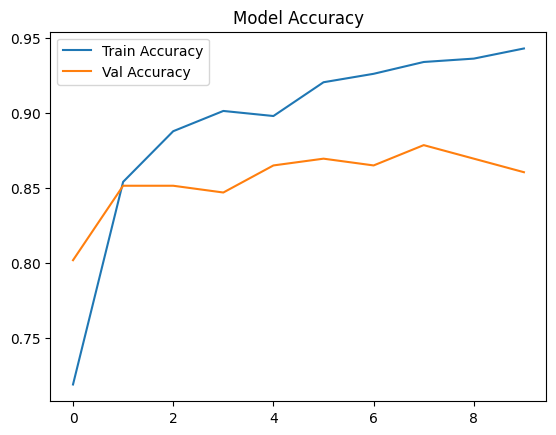

In [27]:
# VISUALIZE AND EVALUATE THE MODEL
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val Accuracy")
plt.title("Model Accuracy")
plt.legend()
plot.show()

In [28]:
#SAVING THE RESULTS 
model.save ("Breast_Cancer_Priority_Model")
results_df.to_csv("Predicted_priorities.csv", index=False)

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=Breast_Cancer_Priority_Model.